In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
temps = calc_temps('2017-08-01', '2017-08-07')
temps

[(72.0, 79.25, 83.0)]

In [135]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_date='2017-08-01'
end_date='2017-08-07'
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
temps = calc_temps(start_date, end_date)
temps


[(72.0, 79.25, 83.0)]

In [39]:
temp_df=pd.DataFrame({'start_date': start_date,
                           'end_date': end_date,
                           'min_temp': [temps[0][0]],
                           'avg_temp': [temps[0][1]],
                           'max_temp': [temps[0][2]]
                          })
temp_df.set_index(['start_date','end_date'],inplace=True)
temp_df

,,min_temp,avg_temp,max_temp
start_date,end_date,,,
2017-08-01,2017-08-07,72.0,79.25,83.0


In [41]:
min_temp = temps[0][0]
avg_temp = temps[0][1]
max_temp = temps[0][2]
max_min = max_temp - min_temp
max_min

11.0

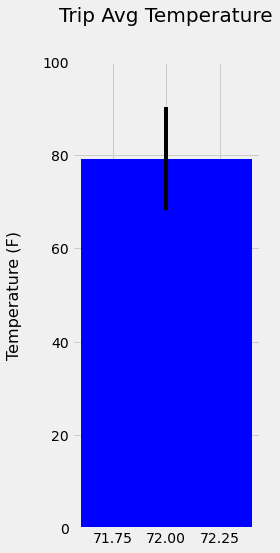

In [162]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
plt.rcParams['figure.figsize']=(3,8)
plt.bar(min_temp, avg_temp, color='blue', align="center",yerr=max_min)
plt.title('Trip Avg Temperature',fontsize=20,pad=40)
plt.ylabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylim(0,100)

plt.show()

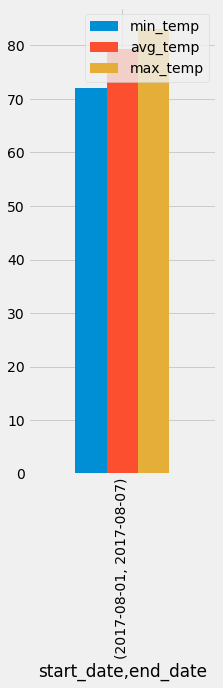

In [161]:
temp_df.plot(kind='bar')

### Daily Rainfall Average

In [80]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
total_precip =(session.query(Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, 
                             Station.longitude, Station.elevation)
                            .filter(Measurement.date >= start_date)
                            .filter(Measurement.date <= end_date)
                            .filter(Measurement.station==Station.station)
                            .group_by(Measurement.station)
                            .order_by(func.sum(Measurement.prcp).desc()).all())
total_precip


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  0.36,
  21.3331,
  -157.8025,
  152.4),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.22,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  0.06,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.04, 21.2716, -157.8168, 3.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.0,
  21.33556,
  -157.71139,
  19.5)]

In [81]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_precip_df=pd.DataFrame(total_precip, columns=['Station', 'Name', 'Precipitation', 'Lat', 'Lng', 'Elevation'])
total_precip_df

,Station,Name,Precipitation,Lat,Lng,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.36,21.33310,-157.80250,152.4
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.22,21.52130,-157.83740,7.0
2,USC00519281,"WAIHEE 837.5, HI US",0.06,21.45167,-157.84889,32.9
3,USC00519397,"WAIKIKI 717.2, HI US",0.04,21.27160,-157.81680,3.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.00,21.33556,-157.71139,19.5


In [78]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [106]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
dates = ['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']
normals = []

def daily_normals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
for date in dates:
    #print(daily_normals(date))
    normals.append(daily_normals(date)[0])
    
normals


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [111]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_normals_df=pd.DataFrame(normals, columns=['Min', 'Avg', 'Max'], index=dates)
#daily_normals_df.index.name='date'
daily_normals_df

,Min,Avg,Max
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


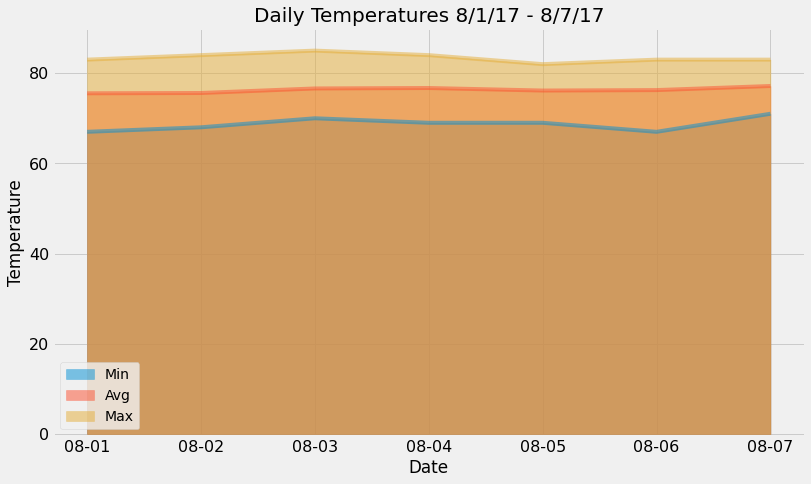

In [123]:
# Plot the daily normals as an area plot with `stacked=False`
plt.rcParams['figure.figsize']=(12,7)
daily_normals_df.plot.area(stacked=False)
plt.ylim(-0.5, 90)
plt.yticks(size=16)
plt.xticks(fontsize=16)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Temperatures 8/1/17 - 8/7/17',fontsize=20)
plt.show()

## Close Session

In [124]:
session.close()